In [1]:
import numpy as np
from PIL import Image

In [22]:
# 2D-convolution on single-channel input with single-channel output
# Zero-padding on input is used such that output size equals input size
# Input: m x l numpy array X containing grayscale pixel data, and k x k kernel 
# K encoding convolution filter weights (assume k is odd number) 
# Output: m x l numpy array of convolution filter activations. Outputs are 
# clipped to the interval [0,255]
def conv2d(X,kernel):
    kernel = np.array(kernel)
    m, l = X.shape
    k = kernel.shape[0]
    output_size_m = m - k + 1
    output_size_l = l - k + 1
    output = np.zeros((output_size_m, output_size_l))
    for i in range(output_size_m):
        for j in range(output_size_l):
            # Extract the region of interest from the input
            region = X[i:i+k, j:j+k]

            # Perform element-wise multiplication and sum
            activation = np.sum(region * kernel)

            # Clip the output to the interval [0, 255]
            output[i, j] = np.clip(activation, 0, 255)
    
    return output

In [2]:
# Converts PIL image to numpy array
def img_to_array(img):
  return np.asarray(img).astype('float32')
  
# Converts numpy array back to PIL image
def array_to_img(arr):
  return Image.fromarray(arr.astype('uint8'))

Image 1:


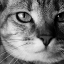

Image 2:


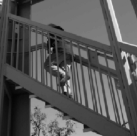

In [4]:
img1 = Image.open('images/image1.png')
img2 = Image.open('images/image2.png')
print('Image 1:')
display(img1)
print('Image 2:')
display(img2)



Image 1 original:


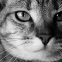

Image 1 blurred:


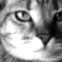

Image 1 sharpened:


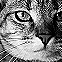

Image 2 original:


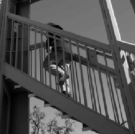

Image 2 vertical edges:


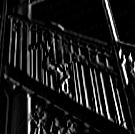

Image 2 horizontal edges:


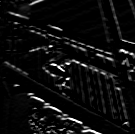

In [24]:
# Different 3 x 3 convolution filters
K_identity = np.matrix('0 0 0; 0 1 0; 0 0 0')
K_blur = np.matrix('0.0625 0.125 0.0625; 0.125 0.5 0.125; 0.0625 0.125 0.0625') 
K_sharpen = np.matrix('0 -1 0; -1 5 -1; 0 -1 0')
K_ver_edges = np.matrix('-1 0 1; -1 0 1; -1 0 1')
K_hor_edges = np.matrix('-1 -1 -1; 0 0 0; 1 1 1') 

# Applying filters to example images
print('Image 1 original:')
display(array_to_img(conv2d(img_to_array(img1),K_identity)))
print('Image 1 blurred:')
display(array_to_img(conv2d(img_to_array(img1),K_blur)))
print('Image 1 sharpened:')
display(array_to_img(conv2d(img_to_array(img1),K_sharpen)))
print('Image 2 original:')
display(array_to_img(conv2d(img_to_array(img2),K_identity)))
print('Image 2 vertical edges:')
display(array_to_img(conv2d(img_to_array(img2),K_ver_edges)))
print('Image 2 horizontal edges:')
display(array_to_img(conv2d(img_to_array(img2),K_hor_edges)))


